<img src='11.jpg'>

# Makine Öğrenmesi ile MNIST Rakam Sınıflandırması

In [1]:
#Her bir sütunun veri birimi farklı
#hepsini aynı scalaya çekmek için veriyi normalleştiririz
#Bütün sütunları benzer bir değerde birleştiririz
#Bütün verileri -1 ile +1 arasına  veya 0 ile 1 arasına indiririz

In [2]:
import pandas as pd

In [3]:
#PCA = Boyut Küçültme

In [4]:
from sklearn.decomposition import PCA

In [5]:
pca=PCA(2)

#2 sutuna düşürmek için parantez içi

In [6]:
import tensorflow as tf

In [7]:
mnist=tf.keras.datasets.mnist

#elle yazılmış olan rakamların datası  60000 örnek var

In [8]:
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()

In [9]:
train_images.shape

(60000, 28, 28)

In [10]:
import matplotlib.pyplot as plt

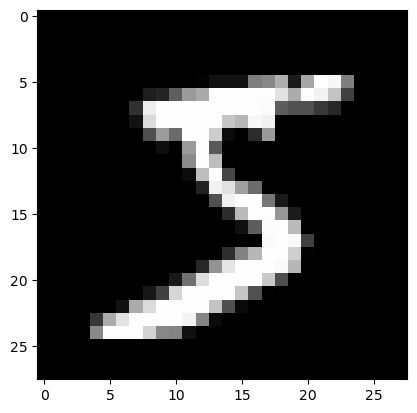

In [11]:
plt.imshow(train_images[0],cmap='gray')

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
data = fetch_openml("mnist_784", version=1)
print(data)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

       pixel10  ..

In [13]:
x, y = data["data"], data["target"]
print(x.shape)

(70000, 784)


In [14]:
#normalize data

In [15]:
train_images=train_images/255.0
test_images=test_images/255.0

#BÜTÜN RAKAMLARI 0 İLE 1 ARASINDA OLMASI İÇİN 255 YE BÖLDÜK
#255 ten daha büyük rakam yok

In [16]:
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense,Conv2D,InputLayer,Reshape,MaxPooling2D,Flatten

#MaxPooling2D= en büyük rakamı buluyor
#Conv2D=CNN
#Flatten= bütün sütunları tek bir satır yapıyor
#Reshape= resmi diziye çevir


In [17]:
##CNN Convolutional Neural Network- Resim tanıma modeli

In [18]:
model=Sequential()

model.add(InputLayer(input_shape=(28,28))) #28 piksel

model.add(Reshape(target_shape=(28,28,1)))

model.add(Conv2D(filters=12,kernel_size=(3,3),activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(10))

model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics='accuracy')

In [19]:
model.fit(train_images,train_labels, validation_split=0.10, epochs=10)

Epoch 1/10
1688/1688 [==============================] - 10s 5ms/step - loss: 0.3028 - accuracy: 0.9151 - val_loss: 0.1234 - val_accuracy: 0.9670
Epoch 2/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.1169 - accuracy: 0.9665 - val_loss: 0.0843 - val_accuracy: 0.9778
Epoch 3/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0819 - accuracy: 0.9766 - val_loss: 0.0662 - val_accuracy: 0.9830
Epoch 4/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0665 - accuracy: 0.9806 - val_loss: 0.0637 - val_accuracy: 0.9830
Epoch 5/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0580 - accuracy: 0.9825 - val_loss: 0.0585 - val_accuracy: 0.9845
Epoch 6/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0520 - accuracy: 0.9848 - val_loss: 0.0595 - val_accuracy: 0.9837
Epoch 7/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0462 - accuracy: 0.9861 - val_loss: 0.0586 - val_accuracy

In [20]:
loss,accuracy=model.evaluate(test_images,test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.0594 - accuracy: 0.9814


In [21]:
accuracy


0.9814000129699707

In [22]:
loss

0.05938093364238739

In [24]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, 
                                                test_size=0.2,
                                                random_state=42)

In [25]:
from sklearn.linear_model import SGDClassifier
model = SGDClassifier()
model.fit(xtrain, ytrain)

SGDClassifier()

In [26]:
predictions = model.predict(xtest)
print(predictions)

['8' '4' '5' ... '2' '7' '1']


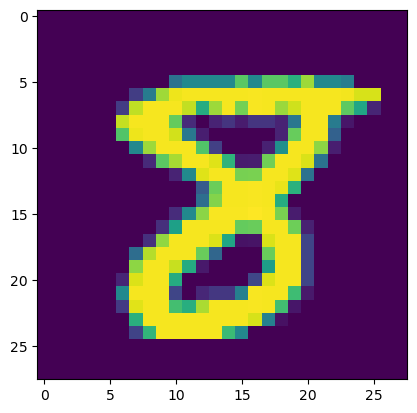

In [27]:
image = np.array(xtest.iloc[0]).reshape(28, 28)
plt.imshow(image)